# Customer Churn Prediction

In [83]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## Loading & Merging Datasets:

In [84]:
train_data = pd.read_csv('customer_churn_dataset-training-master.csv')
test_data = pd.read_csv('customer_churn_dataset-testing-master.csv')

# Merge both datasets into one
data = pd.concat([train_data, test_data], ignore_index=True)

In [85]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


## Exploratory Data Analysis:

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


### Drop 'CustomerID' as we will not use this column:

In [87]:
data = data.drop('CustomerID', axis=1)

In [88]:
data.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


### Display Value Counts for our 'object' Data Types:

In [89]:
for i in data.select_dtypes(include = 'object').columns:
    values = data[i].value_counts()
    print(values)
    print()

Gender
Male      280273
Female    224933
Name: count, dtype: int64

Subscription Type
Standard    170630
Premium     170099
Basic       164477
Name: count, dtype: int64

Contract Length
Annual       198608
Quarterly    197364
Monthly      109234
Name: count, dtype: int64



### Visualize class balance for the target variable:

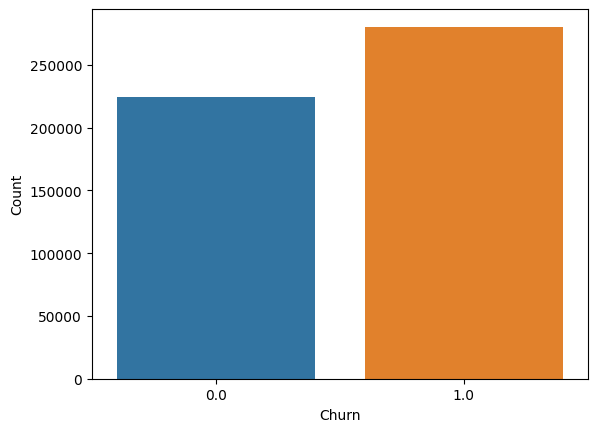

In [90]:
rate = data['Churn'].value_counts()
churn_data = pd.DataFrame({'Churn':rate.index, 'Count':rate.values})
color = ['Red', 'Green']
plt.figure()
sns.barplot(data=churn_data, x='Churn', y='Count', hue='Churn', legend=False)
plt.show()

In [91]:
data['Churn'].value_counts()

Churn
1.0    280492
0.0    224714
Name: count, dtype: int64

### We do have a class imbalance in our 'Churn' values but for now we will choose not to Over Sample the data.

In [92]:
data.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Gender             505206 non-null  object
 1   Subscription Type  505206 non-null  object
 2   Contract Length    505206 non-null  object
dtypes: object(3)
memory usage: 11.6+ MB


### Feature Encoding:

In [93]:
data['Gender'] = data['Gender'].replace({'Male':0, 'Female':1})
data['Subscription Type'] = data['Subscription Type'].replace({'Basic':0, 'Standard':1, 'Premium':2})
data['Contract Length'] = data['Contract Length'].replace({'Quarterly':0, 'Monthly':1, 'Annual':2})

In [94]:
data.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,1.0,39.0,14.0,5.0,18.0,1.0,2.0,932.0,17.0,1.0
1,65.0,1.0,49.0,1.0,10.0,8.0,0.0,1.0,557.0,6.0,1.0
2,55.0,1.0,14.0,4.0,6.0,18.0,0.0,0.0,185.0,3.0,1.0
3,58.0,0.0,38.0,21.0,7.0,7.0,1.0,1.0,396.0,29.0,1.0
4,23.0,0.0,32.0,20.0,5.0,8.0,0.0,1.0,617.0,20.0,1.0


## Feature Selection & Reduction:

### Feature Correlation:

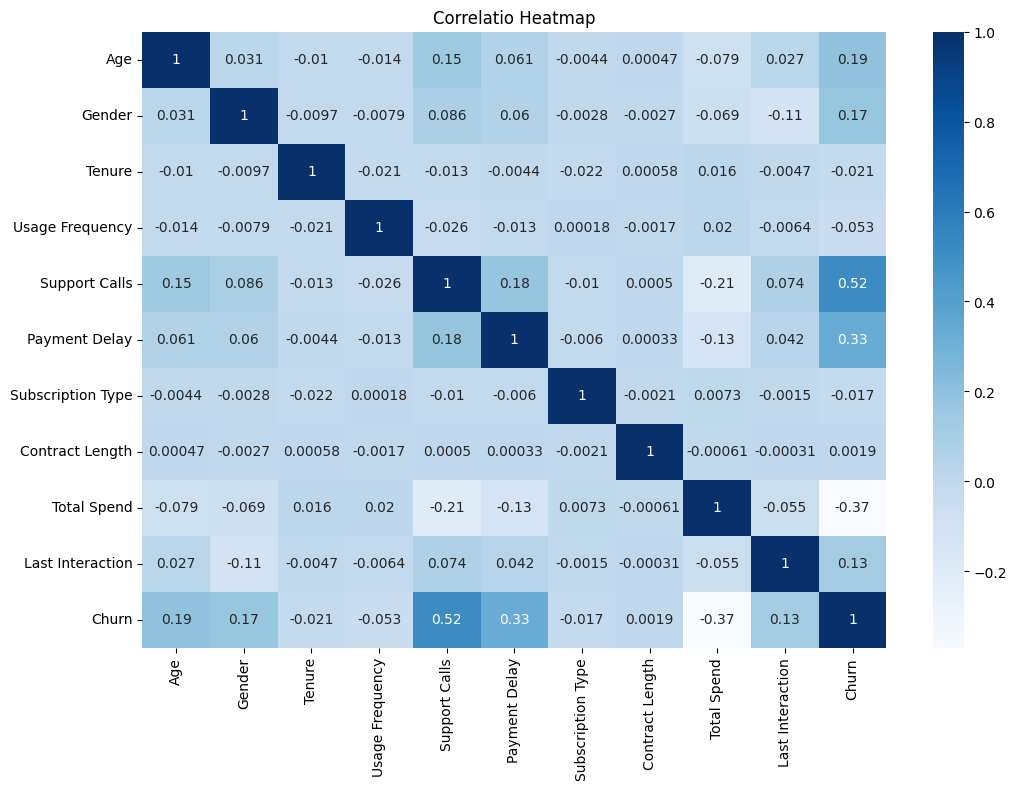

In [95]:
corr = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlatio Heatmap')
plt.show()

#### We will not use the 'Support Calls' feature as it has a high correlation to our target variable. We could also choose to drop 'Payment Delay' later on if we feel the model overfits.

In [96]:
X = data.drop(['Churn', 'Support Calls'],axis=1)
y = data['Churn']

### Scaling of the data:

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1,1))))

### Splitting the data into Training, Validation and Testing sets:

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp,y_temp, test_size=0.4, random_state=0)

## Building our Deep Learning Model:

In [99]:
import tensorflow as tf

In [100]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [101]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

### Training and Validating The Model:

In [102]:
model.fit(X_train, y_train, batch_size=16, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
18946/18946 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.8219 - loss: 0.4340 - val_accuracy: 0.8737 - val_loss: nan
Epoch 2/5
18946/18946 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.8760 - loss: 0.3623 - val_accuracy: 0.8838 - val_loss: nan
Epoch 3/5
18946/18946 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.8822 - loss: 0.3491 - val_accuracy: 0.8881 - val_loss: nan
Epoch 4/5
18946/18946 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.8881 - loss: 0.3386 - val_accuracy: 0.8915 - val_loss: nan
Epoch 5/5
18946/18946 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.8914 - loss: 0.3321 - val_accuracy: 0.8928 - val_loss: nan


### Evaluating the model on the test data:

In [103]:
model.evaluate(X_test, y_test)

2527/2527 ━━━━━━━━━━━━━━━━━━━━ 2s 660us/step - accuracy: 0.8927 - loss: 0.3292


[0.32874152064323425, 0.8937823176383972]

# Overall our model performs quite well on the data, performing with an accuracy of 89.27%